In [20]:
# import cv2
# img = cv2.imread("C:\\Users\\zxdao\\Desktop\\001.jpg")


# # print img.shape

# def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         xy = "%d,%d" % (x, y)
#         cv2.circle(img, (x, y), 1, (255, 0, 0), thickness=-1)
#         cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
#                     1.0, (0, 0, 0), thickness=1)
#         cv2.imshow("image", img)


# cv2.namedWindow("image")
# cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
# cv2.imshow("image", img)

# while (True):
#     try:
#         cv2.waitKey(100)
#     except Exception:
#         cv2.destroyAllWindows()
#         break

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

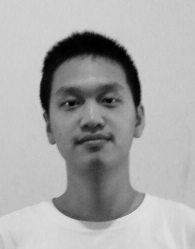

In [22]:
im = Image.open('C:\\Users\\zxdao\\Desktop\\001.jpg')
im = im.convert('L')
im

In [23]:
im = np.mat(im)
print('图形尺寸：', im.shape)
im

图形尺寸： (249, 195)


matrix([[207, 208, 208, ..., 196, 197, 197],
        [208, 208, 208, ..., 197, 198, 198],
        [208, 208, 209, ..., 198, 199, 198],
        ...,
        [190, 192, 191, ..., 190, 190, 191],
        [191, 192, 189, ..., 192, 192, 192],
        [195, 192, 185, ..., 195, 192, 192]], dtype=uint8)

In [24]:
#def getPos()

getPos = [
    [103,72],
    [101,109],
    [140,95]
]      #初始三点位置（实际需要获取！！！！！）

In [25]:
#def getTargetPos()

targetPos = [
    [25,24],
    [25,76],
    [75,50]
]      #目标位置（写成函数传入）

In [26]:
#齐次化函数
def toHomogeneous(data, axis=1):
    data = np.insert(data, len(data[0]), 1, axis=axis)      #默认插入一列1
    return data

In [27]:
#获得仿射变换矩阵
def getTrans(oriPos, targetPos):
    oriPos = np.mat(oriPos)
    targetPos = np.mat(targetPos)
    
    trans = np.linalg.inv(oriPos.T*oriPos)*oriPos.T*targetPos
    
    return trans

In [28]:
getPos = toHomogeneous(getPos)
targetPos = toHomogeneous(targetPos)
trans = getTrans(getPos, targetPos)
getPos

array([[103,  72,   1],
       [101, 109,   1],
       [140,  95,   1]])

In [29]:
#获得图像四角坐标
def get_xycorner(im):
    xlen, ylen = im.shape[0]-1, im.shape[1]-1      #以像素为单位的原图的0轴长与1轴长
    xycorner = np.array([
        [0,0,1],
        [0,ylen,1],
        [xlen,0,1],
        [xlen,ylen,1]
    ])      #四个顶点的齐次坐标
    return xycorner

In [30]:
xycorner = get_xycorner(im)
xycorner

array([[  0,   0,   1],
       [  0, 194,   1],
       [248,   0,   1],
       [248, 194,   1]])

In [31]:
#定义方法：将向量组传入vectors，变换矩阵传入transMat，返回变换后的向量组
def transform(vectors, transMat):
    return (vectors*transMat)

In [32]:
#计算变换后的四顶点齐次坐标
uvcorner = transform(xycorner, trans)
uvcorner

matrix([[-114.75265018,  -59.51236749,    1.        ],
        [-101.04240283,  211.40212014,    1.        ],
        [ 209.48763251, -100.52438163,    1.        ],
        [ 223.19787986,  170.39010601,    1.        ]])

In [33]:
#最终图片的大小(len_0,len_1)
len_0 = uvcorner.max(axis=0)[0,0] - uvcorner.min(axis=0)[0,0]
len_1 = uvcorner.max(axis=0)[0,1] - uvcorner.min(axis=0)[0,1]
print(len_0,len_1)

337.950530035337 311.92650176678393


In [34]:
#获取后向仿射变换矩阵
def get_inv_trans(trans):
    inv_trans = np.linalg.inv(trans)      #后向矩阵
    return inv_trans

In [35]:
inv_trans = get_inv_trans(trans)
inv_trans

matrix([[ 7.60000000e-01,  9.00000000e-02, -5.82957102e-17],
        [-3.84615385e-02,  7.11538462e-01, -3.68359898e-17],
        [ 8.49230769e+01,  5.26730769e+01,  1.00000000e+00]])

In [36]:
#image = Image.fromarray(matrix)      #矩阵转化为图片
#创建图像数组
import math
new_array = np.zeros((math.floor(101),math.floor(101)))

In [37]:
def nearestColor(point, im):
    x = 0
    y = 0
    if (point[0,0]-math.floor(point[0,0])<0.5):
        x = math.floor(point[0,0])
    else:
        x = math.ceil(point[0,0])
    if (point[0,1]-math.ceil(point[0,1]<0.5)):
        y = math.floor(point[0,1])
    else:
        y = math.ceil(point[0,1])
    return (im[x,y])
            

for i in range(math.floor(101)):
    for j in range(math.floor(101)):
        point = transform(np.mat([i,j,1]), inv_trans)
        if (point[0,0]>xycorner.max(axis=0)[0]
            or point[0,0]<xycorner.min(axis=0)[0]
            or point[0,1]>xycorner.max(axis=0)[1]
            or point[0,1]<xycorner.min(axis=0)[1]
           ):
            new_array[i,j] = 255
        else:
            new_array[i,j] = nearestColor(point, im)
            
new_image = Image.fromarray(np.mat(new_array))
new_image.show()